# Life Expectancy and GDP

*A dataset from World Health Organization and the World Bank.*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset and rename it's columns to work easier with this data.
df = pd.read_csv('all_data.csv')
columns_names = {'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'}
df.rename(columns = columns_names, inplace = True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [3]:
# Know the unique values that each column has and get an idea which are categorical and quantitative
for column in df.columns:
    print(f'{column} values: {df[column].unique()}')

country values: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
year values: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
life_expectancy values: [77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
gdp values: [7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.10995000e+12 6.10062000e+12 7.57255000e+12

> ## Data Dictionary

We can see that this dataset contains 4 columns:

1. **Country:** contains 6 different countries *Chile, China, Germany, Mexico, United States of America and Zimbabwe*.
2. **Year:** contains the year of measurement, going from *2000 to 2015*.
3. **Life Expectancy at Birth (years):** contains the life expectancy for each country measured in a specific year.
4. **GDP (Gross Domestic Product):** contains the gross domestic product for each country measured in a specific year.

The total *lenght* of this dataset are **96 rows** all with *non-null* values.

**Categorical Variables**
* Country - *object*
* Year - *int64*

**Quantitative Variables**
* Life Expectancy at Birth (years) - *float64*
* GDP (Gross Domestic Product) - *float64*

> ## Project Goals

In this project, I will address the following questions:

* How has Life Expectancy changed and GDP over the years for each Country?
* Which Country has the biggest Life Expectancy and GDP in 2000 and 2015?
* What is the average Life Expectancy and GDP for each Country over the years?
* Is GDP correlated with Life Expectancy?

> ## Exploratory Data Analysis

In [4]:
# Normalize GDP values dividing them by 1 billion
df['gdp'] = df.gdp.apply(lambda x: x / (10 ** 10))

In [5]:
# Sumarize Life Expectancy values for each country
df.pivot_table(values = 'life_expectancy', columns = 'country', index = 'year')

country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3
2005,78.4,73.9,79.2,75.3,77.5,44.6
2006,78.9,74.2,79.6,75.8,77.8,45.4
2007,78.9,74.4,79.8,76.0,78.1,46.6
2008,79.6,74.5,79.9,75.6,78.2,48.2


In [6]:
# Sumarize GDP values for each country
df.pivot_table(values = 'gdp', columns = 'country', index = 'year')

country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
year,,,,,,
2000,7.786093,121.135,194.995,68.3648,1030.0,0.668996
2001,7.097992,133.940,195.065,72.4704,1060.0,0.677738
2002,6.973681,147.055,207.914,74.1560,1100.0,0.634212
2003,7.564346,166.029,250.573,71.3284,1150.0,0.572759
2004,9.921039,195.535,281.925,77.0268,1230.0,0.580560
2005,12.296500,228.597,286.141,86.6346,1310.0,0.575522
2006,15.478800,275.213,300.245,96.5281,1390.0,0.544390
2007,17.360600,355.218,343.995,104.3470,1450.0,0.529195
2008,17.963800,459.821,375.237,110.1280,1470.0,0.441570


In [7]:
# Group by Life Expectancy and GDP Averages
print('Countries Life Expectancy Average from 2000 to 2015')
print(df.groupby('country').life_expectancy.mean().sort_values(ascending = False))

print('Countries GDP Average from 2000 to 2015')
print(df.groupby('country').gdp.mean().sort_values(ascending = False))

Countries Life Expectancy Average from 2000 to 2015
country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64
Countries GDP Average from 2000 to 2015
country
United States of America    1407.500000
China                        495.771375
Germany                      309.477562
Mexico                        97.665063
Chile                         16.978885
Zimbabwe                       0.906258
Name: gdp, dtype: float64


### Life Expectancy and GDP among the years

From the L.E. and G.D.P. pivot tables, I can see the following:

#### Insights from year 2000
In *2000* **Germany** was the country with the biggest L.E. (78 years) followed by **Chile** with 77.3 years. But, if we compare it to GDP, **USA** was the one with the biggest GDP ($1,030 billions) followed by **Germany** with $195 billions.

#### Insights from year 2015
Fast forward to year *2015*, **Germany** remained in first place of the biggest L.E. (81 years) also followed by **Chile** with 80.5 years. Comparing GDP over this years, **USA** remained in first place with $1,810 billions and awesomely followed by **China** with $1,106 billions; China was in the third place in the beggining of 2000.

We are talking about a L.E. increase for **Germany** of *3 years* in average, and for **USA** an increase of *$780 billions of dollars* in their GDP.

Let's dive into some visualizations to get a clearer view of this EDA.

> ## Visualizations

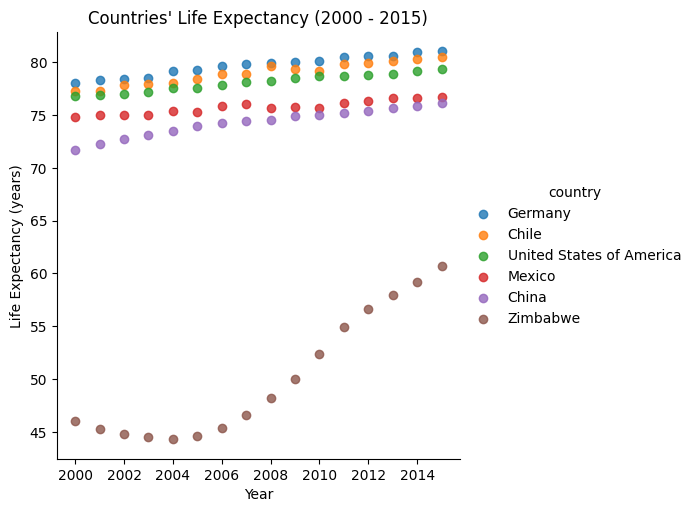

<Figure size 640x480 with 0 Axes>

In [8]:
sns.lmplot(data = df, x = 'year', y = 'life_expectancy', hue = 'country', fit_reg = False, hue_order = ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe'])
plt.title("Countries' Life Expectancy (2000 - 2015)")
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.show()
plt.clf()

We can see that, both our pivot table and visualization get to the same results. **Germany** and **Chile** have the biggest amounts of Life Expectancy, and **Zimbabwe** has the lowest.

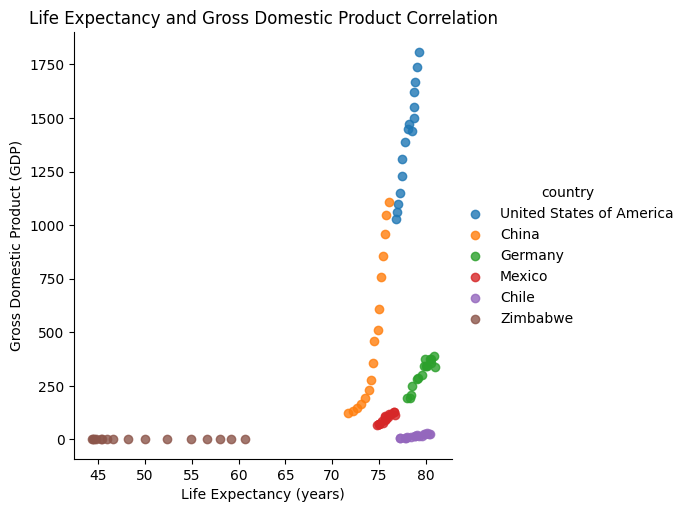

<Figure size 640x480 with 0 Axes>

In [13]:
sns.lmplot(data = df, x = 'life_expectancy', y = 'gdp', hue = 'country', fit_reg = False, hue_order = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe'])
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Gross Domestic Product (GDP)')
plt.title('Life Expectancy and Gross Domestic Product Correlation')
plt.show()
plt.clf()

We can see a low positive correlation between *Life Expectancy* and *Gross Domestic Product* except for **Chile** and **Zimbabwe** which almost stayed the same in GDP but increased in Life Expectancy.